### YoLo -> You Only Look Once
- YOLO is a state-of-the-art, real-time object detection system.
- YOLO is a clever neural network for doing object detection in real-time.
- YOLO is extremely fast and accurate.
- Invented in 2015

- In CNN, FastRCNN, RCNN etc it majorly focuses on creating bounding box first and then predicting or classifying into classes, it has drawbacks like :
    - It is slow
    - It is not end-to-end
    - It is multistage approach
    - each component trained separately
- ***Idea of Yolo is that it is a single stage approach that is reframing object detection as a single stage regression problem***

**Steps of Yolo V1**
- Take Input Image
- Resize into 448*448(number is fixed on basis of model architecture, currently YoLo V1)
- Divide image into S*S grid (usualy 7 in V1)
- each cell is responsible for predicting one object
- the cell where center of object falls into is responsible for detection

- BOUNDING BOXES
    - Box -> x,y axis and width, height, Eg: (200,311,120,250)
    - x: 200
    - y: 311
    - width: 142
    - height: 250

    - Calculations to  be done:
        - del x = (x-x')/64             x',y' -> coordinate of ledt top point of cell
        - del y = (y-y')/64             x,y -> center point coordinates
        - del w = w/448                 normalizing by dividing by 448
        - del h = h/448

    - Eg: 

    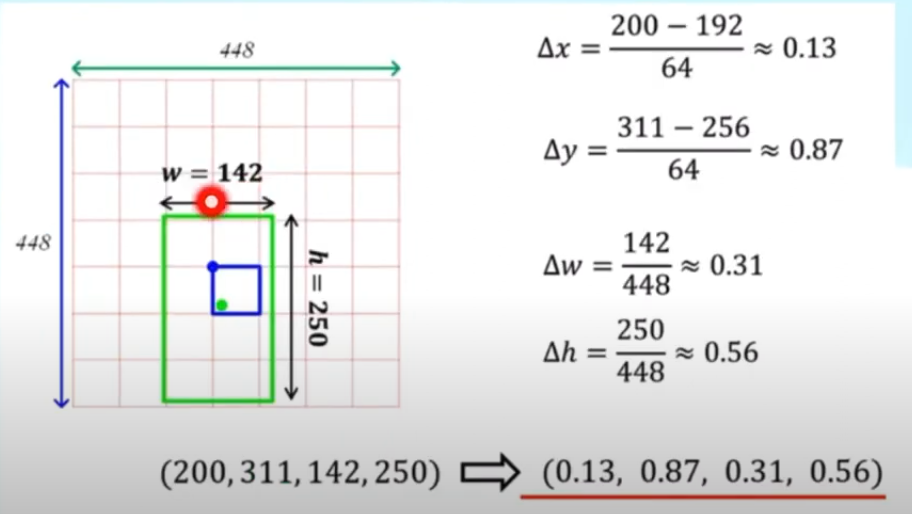

- For object score or confidence score -> 1 or 0
- For class prediction -> 20 classes in V1

- Understanding prediction vector:
    - each grid predicts:
        - 2 bounding boxes (B=2)
            - for each bounding box:
                - 5 predictions (x,y,w,h,confidence)
                - 20 class predictions
    - Total = S * S * (B*5+C) = 7 * 7 *(2*5+20) = 1470

- Output Parsing:
    - p comes out from the maximum of probability scores.
    - p is the probability of the class with the highest score.
    - confidence score: c1^ = c1 * p
    - confidence score: c2^ = c2 * p
    - confidence score: c^ = max(c1^,c2^)
        - if c^ > threshold, then object is detected
            - if object detected, then class is selected with highest score
            - then bounding box is selected with highest confidence score
            - then bounding box is drawn on image


                                        THIS IS HOW YOLO WORKS               


- Architecture of YoLo V1
    - Inspired by GoogleNet Model
    - 24 Convolutional Layers
    - 2 Fully Connected Layers
    - 1 Softmax Layer

    - 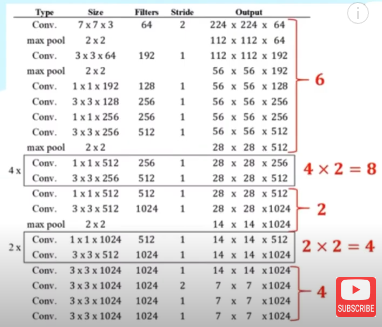

    - final layer : 7 * 7 * 1024 and on flattening to 50176 feature vector
    - pass through 2 fully connected layers
    - final layer is softmax layer
    - 1470 outputs (7 * 7 * (2*5+20))

- Training proces:
    - Dataset: Pascal VOC - 20 classes
    - network pretrained on imagenet at 224 * 224
    - actual training on 448 * 448 on voc dataset


- Loss Function:
    - Loss L is the sum of losses overall grid cels S * S
    - Put more imprtance on grid cells that contain objs and decrease for those having no object
    - L = L_cls + L_conf + L_box
    - L_box =  Objectness Loss ; L_conf :  Box regression loss ; L_cls : Classification loss
        - ALl 3 are sum of squared errors on predicted values to ground truth values
    - L' = Lambda * L 
    - Lambda = 5

    - Object Confidence Loss:
    - 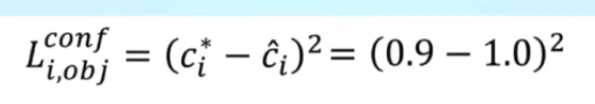
    
    - Classiciation Loss:
    - 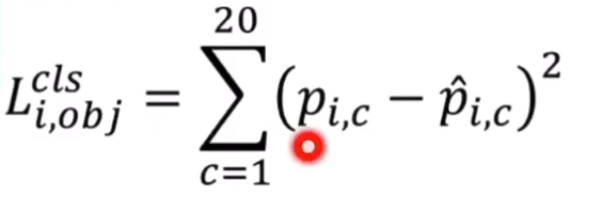



**FAST YOLO** -> 9 layers instead of 24, rest same.
- 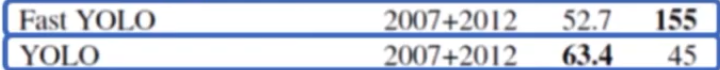


- Limitations of Yolo V1
    - max of 49 objects can be detected
    - localization errors i.e poor localization
    - background noise
    - difficulty in detecting small objects that appears in groups